In [6]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#input data files
pathfile1="C:\Jupyter\Cab_Data.csv"
pathfile2="C:\Jupyter\City.csv"
pathfile3="C:\Jupyter\Customer_ID.csv"
pathfile4="C:\Jupyter\Transaction_ID.csv"

In [8]:
# Import following python libraries to utilize in EDA process.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime

## Importing Datasets

In [9]:
pathfile1 = "C:\Jupyter\Cab_Data.csv"
CabData = pd.read_csv(pathfile1)
missing_value = 0
for column in CabData.columns :
    missing_value += CabData[column].isna().sum() + CabData[column].isnull().sum()
print('CabData dataset has {} entries , {} features and {} missing values'.format(CabData.shape[0] ,CabData.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(CabData.dtypes))
CabData.head(10)

CabData dataset has 359392 entries , 7 features and 0 missing values

Feature's datatypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [10]:
pathfile2 = "C:\Jupyter\City.csv"
City = pd.read_csv(pathfile2)
missing_value = 0
for column in City.columns :
    missing_value += City[column].isna().sum() + City[column].isnull().sum()
print('City dataset has {} entries , {} features and {} missing values'.format(City.shape[0] ,City.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(City.dtypes))
City.head(20)

City dataset has 20 entries , 3 features and 0 missing values

Feature's datatypes

City          object
Population    object
Users         object
dtype: object


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [11]:
pathfile3 = "C:\Jupyter\Customer_ID.csv"
CustomerID = pd.read_csv(pathfile3)
missing_value = 0
for column in CustomerID.columns :
    missing_value += CustomerID[column].isna().sum() + CustomerID[column].isnull().sum()
print('CustomerID dataset has {} entries , {} features and {} missing values'.format(CustomerID.shape[0] ,CustomerID.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(CustomerID.dtypes))
CustomerID.head(10)

CustomerID dataset has 49171 entries , 4 features and 0 missing values

Feature's datatypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [12]:
pathfile4 = "C:\Jupyter\Transaction_ID.csv"
TransactionID = pd.read_csv(pathfile4)
missing_value = 0
for column in TransactionID.columns :
    missing_value += TransactionID[column].isna().sum() + TransactionID[column].isnull().sum()
print('TransactionID dataset has {} entries , {} features and {} missing values'.format(TransactionID.shape[0] ,TransactionID.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(TransactionID.dtypes))
TransactionID.head(10)

TransactionID dataset has 440098 entries , 3 features and 0 missing values

Feature's datatypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


## Creating Master Data

In [14]:
# Merging 4 files into one MasterData.
MasterData = CabData.merge(TransactionID, on= 'Transaction ID').merge(CustomerID, on ='Customer ID').merge(City, on = 'City')
missing_value = 0
for column in MasterData.columns :
    missing_value += MasterData[column].isna().sum() + MasterData[column].isnull().sum()
print('MasterData dataset has {} entries , {} features and {} missing values'.format(MasterData.shape[0] ,MasterData.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(MasterData.dtypes))
MasterData.head(10)

MasterData dataset has 359392 entries , 14 features and 0 missing values

Feature's datatypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


## Data Wrangling

In [106]:
#replacing ',' with '_' in column names 

for column in MasterData.columns:
    if ' ' in column:
        MasterData = MasterData.rename(columns={column:column.replace(' ','_')})
        
for column in ["Population","Users"] :
    
        MasterData[column] = MasterData[column].str.replace(',','')
        
MasterData.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Margins,Date_of_Travel
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,1970-01-01 00:00:00.000042377
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,1970-01-01 00:00:00.000043302
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,1970-01-01 00:00:00.000043427
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,1970-01-01 00:00:00.000042375
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,1970-01-01 00:00:00.000043211
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701,50.8912,1970-01-01 00:00:00.000043224
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701,25.0960,1970-01-01 00:00:00.000043400
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,27.5680,1970-01-01 00:00:00.000042371
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,210.0920,1970-01-01 00:00:00.000042634
9,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701,118.9736,1970-01-01 00:00:00.000042909


In [129]:
# formatting of columns in appropriate format

for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        MasterData[column] = MasterData[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        MasterData[column] = MasterData[column].astype('int64')
        
print("\nFeature's datatypes\n\n{}".format(MasterData.dtypes))



Feature's datatypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income_(USD/Month)             int64
Population                     int64
Users                          int64
Margins                      float64
Date_of_Travel        datetime64[ns]
dtype: object


In [193]:
# Converted Data of Travel column to datetime object.

MasterData['Date_of_Travel'] = pd.to_datetime(MasterData['Date_of_Travel'])

# Exploratory Data Analysis

### Descriptive Statistics & Visulizations

In [17]:
# Normalizing the Master Data into two datasets 'Pink Cab' & 'Yellow Cab'
Pink_MasterData = MasterData [MasterData['Company'] == 'Pink Cab'] 
Yellow_MasterData = MasterData [MasterData['Company'] == 'Yellow Cab']
selected_columns = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' ,'Income_(USD/Month)', 'Population' , 'Users']

In [18]:
# Statistical Summary of Pink Cab Firm
filtered_Pink_MasterData = Pink_MasterData[selected_columns]
Pink_Cab_StatsInfo = filtered_Pink_MasterData.describe()
Pink_Cab_StatsInfo

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137,2.350642e+06,125590.813330
std,12.231092,181.995661,135.403345,12.644780,7991.077762,2.734890e+06,94593.433659
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000,8.148850e+05,27247.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000,1.595037e+06,144132.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000,1.955130e+06,164468.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [13]:
# Statistical Summary of Yellow Cab Firm
filtered_Yellow_MasterData = Yellow_MasterData[selected_columns]
Yellow_Cab_StatsInfo = filtered_Yellow_MasterData.describe()
Yellow_Cab_StatsInfo

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817,3.373228e+06,168473.246981
std,12.234298,288.386166,162.548986,12.578625,7962.727062,3.439014e+06,100570.558886
min,1.900000,20.730000,22.800000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000,6.712380e+05,80021.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000,1.595037e+06,144132.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000,8.405837e+06,302149.000000


In [15]:
# Highlight Outliers and Interquartile range
def showIQRstats(dataFrame_statsinfo,column_name):
    
    mean   = dataFrame_statsinfo[column_name][1]
    median = dataFrame_statsinfo[column_name][5]
    median_mean_ratio = median/mean
    Q1     = dataFrame_statsinfo[column_name][4]
    Q3     = dataFrame_statsinfo[column_name][6]
    IQR    = Q3-Q1
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    
    print('\n\n' + "mean of : " + str(column_name) + " is " + str(mean) +
          '\n' + "median of : " + str(column_name) + " is " + str(median) +
          '\n' + "median/mean ratio of : " +  str(column_name) + " is " + str(median_mean_ratio) +
          '\n' + "Q1 value of : "  + str(column_name) + " is "  + str(Q1) +
          '\n' + "Q3 value of : "  + str(column_name) + " is "  + str(Q3) + 
          '\n' + "IQR value of : " + str(column_name) + " is " + str(IQR) + 
          '\n' + "Upper and Lower Limits of " + str(column_name) + " is "  + str((lower_band,upper_band))
         )
    
    return upper_band , lower_band

In [16]:
print('Statistical infos of Pink Cab Firm :')
for column_name in selected_columns :
    upper_band , lower_band = showIQRstats(Pink_Cab_StatsInfo , column_name)
    outliers = filtered_Pink_MasterData[(filtered_Pink_MasterData[column_name] < lower_band) | (filtered_Pink_MasterData[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Statistical infos of Pink Cab Firm :


mean of : KM_Travelled is 22.559916775861275
median of : KM_Travelled is 22.44
median/mean ratio of : KM_Travelled is 0.9946845204681968
Q1 value of : KM_Travelled is 12.0
Q3 value of : KM_Travelled is 32.96
IQR value of : KM_Travelled is 20.96
Upper and Lower Limits of KM_Travelled is (-19.44, 64.4)

KM_Travelled has 0 outliers : []


**********************************************************



mean of : Price_Charged is 310.80085620521635
median of : Price_Charged is 298.06
median/mean ratio of : Price_Charged is 0.9590063670969948
Q1 value of : Price_Charged is 159.97
Q3 value of : Price_Charged is 441.505
IQR value of : Price_Charged is 281.53499999999997
Upper and Lower Limits of Price_Charged is (-262.3325, 863.8074999999999)

Price_Charged has 237 outliers : [ 902.65  870.48  896.35  901.07  869.94  891.22  901.71 1078.86  953.
  885.4   880.62  903.42  905.8   889.1  1105.72  880.57  910.33  954.04
  997.84 1021.72  983.99  870.29 1022.59

In [17]:
print('Statistical infos of Yellow Cab Firm :')
for column_name in selected_columns :
    upper_band , lower_band = showIQRstats(Yellow_Cab_StatsInfo , column_name)
    outliers = filtered_Yellow_MasterData[(filtered_Yellow_MasterData[column_name] < lower_band) | (filtered_Yellow_MasterData[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Statistical infos of Yellow Cab Firm :


mean of : KM_Travelled is 22.56951689414197
median of : KM_Travelled is 22.44
median/mean ratio of : KM_Travelled is 0.9942614237269923
Q1 value of : KM_Travelled is 11.99
Q3 value of : KM_Travelled is 32.96
IQR value of : KM_Travelled is 20.97
Upper and Lower Limits of KM_Travelled is (-19.464999999999996, 64.41499999999999)

KM_Travelled has 0 outliers : []


**********************************************************



mean of : Price_Charged is 458.1819899811058
median of : Price_Charged is 425.06
median/mean ratio of : Price_Charged is 0.9277099696073352
Q1 value of : Price_Charged is 226.68
Q3 value of : Price_Charged is 633.88
IQR value of : Price_Charged is 407.2
Upper and Lower Limits of Price_Charged is (-384.11999999999995, 1244.6799999999998)

Price_Charged has 3240 outliers : [1341.17 1412.06 1540.61 ... 1282.89 1385.05 1406.5 ]


**********************************************************



mean of : Cost_of_Trip is 297.92200414007

Text(0, 0.5, 'Yellow Cab')

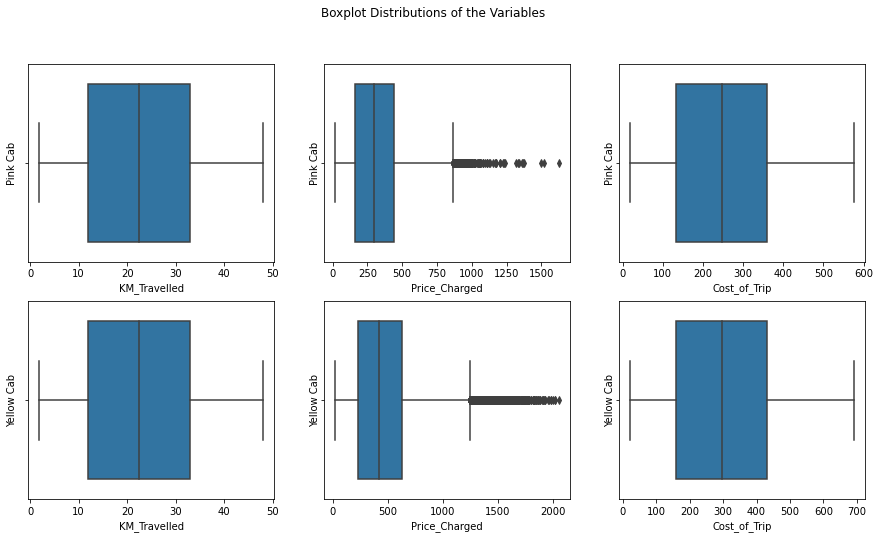

In [57]:
# Boxplot-variables used-KM_Travelled, Price_Charged,Cost_of_Trip
fig,axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,        data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   ,     data=filtered_Pink_MasterData  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,        data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   ,     data=filtered_Yellow_MasterData  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,        data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")


### Outliers
### The price charge range for Yellow cab is more than the Pink cab.

Text(0, 0.5, 'Yellow Cab')

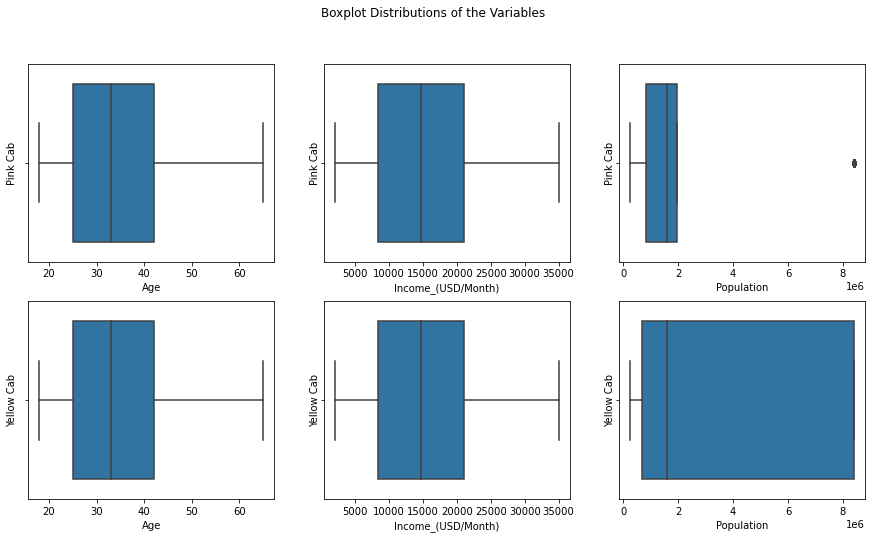

In [59]:
# Boxplot- Variables used- Age,Income_(USD/Month),Population
fig,axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Age' ,                 data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)' ,  data=filtered_Pink_MasterData  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Population' ,          data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,                 data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,  data=filtered_Yellow_MasterData  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Population' ,          data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")

<AxesSubplot:>

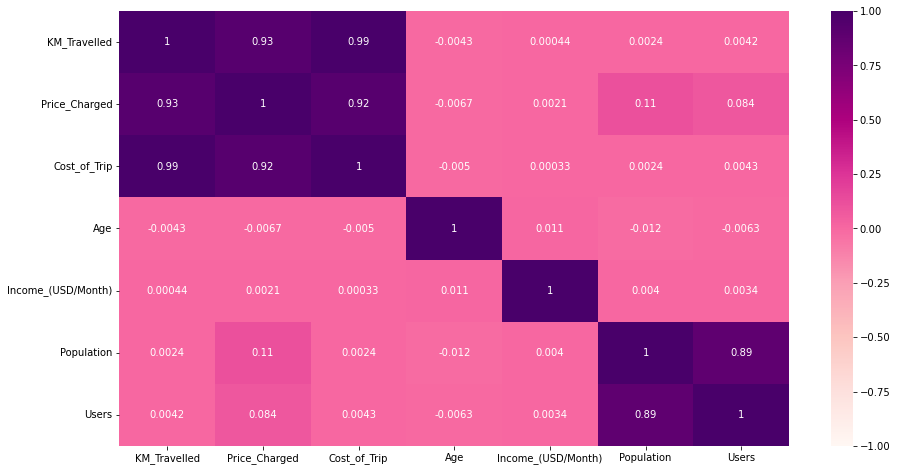

In [64]:
# Pink Cab Correlation Heatmap
Pink_Cab_Corr = filtered_Pink_MasterData.corr()
plt.figure(figsize=(15,8))
sns.heatmap(Pink_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='RdPu')

<AxesSubplot:>

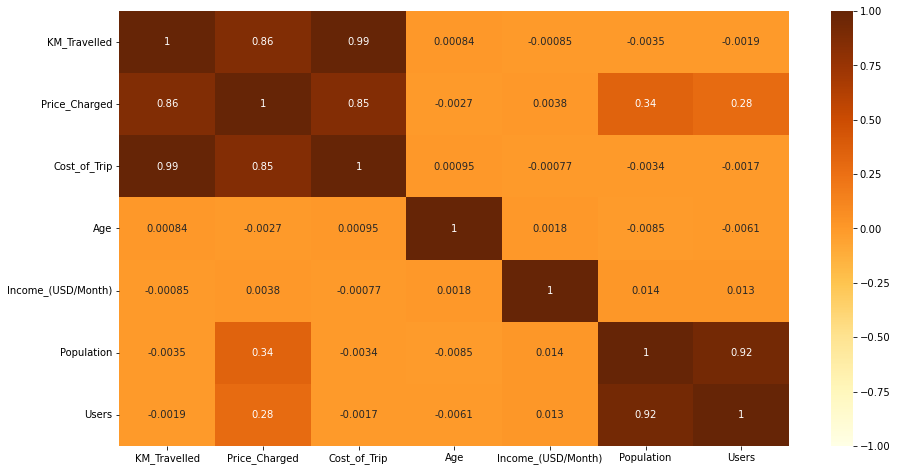

In [63]:
# Yellow Cab Correlation Heatmap
Yellow_Cab_Corr = filtered_Yellow_MasterData.corr()
plt.figure(figsize=(15,8))
sns.heatmap(Yellow_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='YlOrBr')

C:\Users\innam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\innam\AppData\Local\Temp\ipykernel_11928\892290655.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
C:\Users\innam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\innam\AppData\Local\Temp\ipykernel_11928\892290655.py:28: UserWarning: FixedFormatter should only be used together with FixedLo

[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

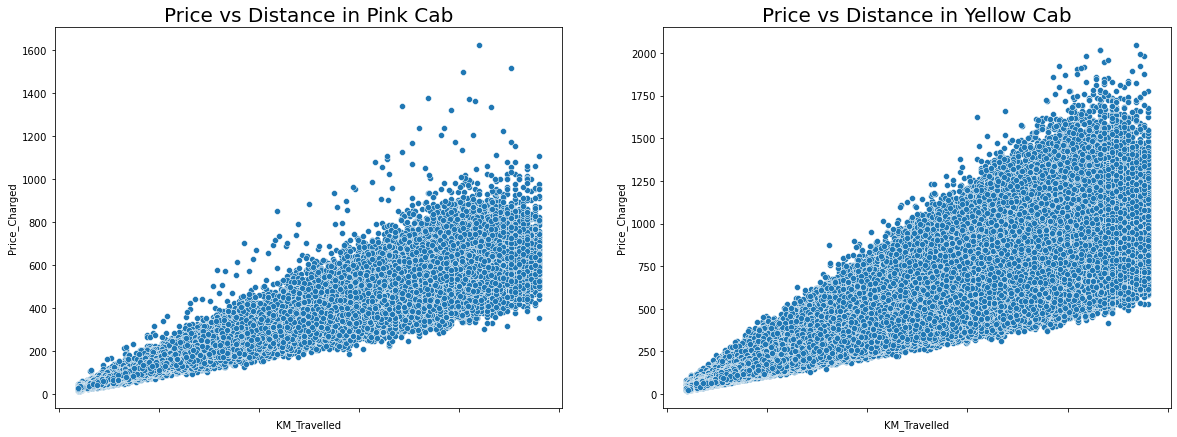

In [21]:
# Import following python libraries to utilize in EDA process.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime

Pink_MasterData = MasterData [MasterData['Company'] == 'Pink Cab'] 
Yellow_MasterData = MasterData [MasterData['Company'] == 'Yellow Cab']
selected_columns = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' ,'Income_(USD/Month)', 'Population' , 'Users']
filtered_Pink_MasterData = Pink_MasterData[selected_columns]
Pink_Cab_StatsInfo = filtered_Pink_MasterData.describe()
filtered_Yellow_MasterData = Yellow_MasterData[selected_columns]
Yellow_Cab_StatsInfo = filtered_Yellow_MasterData.describe()


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(filtered_Pink_MasterData['KM_Travelled'], filtered_Pink_MasterData['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(filtered_Yellow_MasterData['KM_Travelled'], filtered_Yellow_MasterData['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)

### There is a positive correlation in the graph for both Pink and Yellow cab
### The price for Yellow cab is higher compared to Pink cab.

In [27]:
# Obtain Covariance for Master Data
cov1  = np.cov(MasterData['KM_Travelled'],MasterData['Price_Charged'])[0][1]
cov2  = np.cov(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])[0][1]
cov3  = np.cov(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])[0][1]
cov4  = np.cov(MasterData['Users'],MasterData['Population'])[0][1]
cov5  = np.cov(MasterData['Population'],MasterData['Price_Charged'])[0][1]
cov6  = np.cov(MasterData['Users'],MasterData['Price_Charged'])[0][1]

print('Covariance for  KM_Travelled - Price_Charged : '+ str(cov1))
print('Covariance for  KM_Travelled - Cost_of_Trip : '+ str(cov2))
print('Covariance for  Price_Charged - Cost_of_Trip : '+ str(cov3))
print('Covariance for  Users - Population : '+ str(cov4))
print('Covariance for  Population - Price_Charged : '+ str(cov5))
print('Covariance for  Users - Price_Charged : '+ str(cov6))


Covariance for  KM_Travelled - Price_Charged : 2805.307041308074
Covariance for  KM_Travelled - Cost_of_Trip : 1897.7357483737053
Covariance for  Price_Charged - Cost_of_Trip : 37272.94904600304
Covariance for  Users - Population : 306082774585.4572
Covariance for  Population - Price_Charged : 297071855.0581949
Covariance for  Users - Price_Charged : 7777261.839139377


In [28]:
# Pearsons Correlation Coefficients
pcorr_coef1 , _ = stats.pearsonr(MasterData['KM_Travelled'],MasterData['Price_Charged'])
pcorr_coef2 , _ = stats.pearsonr(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])
pcorr_coef3 , _ = stats.pearsonr(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])
pcorr_coef4 , _ = stats.pearsonr(MasterData['Users'],MasterData['Population'])
pcorr_coef5 , _ = stats.pearsonr(MasterData['Population'],MasterData['Price_Charged'])
pcorr_coef6 , _ = stats.pearsonr(MasterData['Users'],MasterData['Price_Charged'])

print('pearson correlation coefficient for  KM_Travelled - Price_Charged : '+ str(pcorr_coef1))
print('pearson correlation coefficient for  KM_Travelled - Cost_of_Trip : '+ str(pcorr_coef2))
print('pearson correlation coefficient for  Price_Charged - Cost_of_Trip : '+ str(pcorr_coef3))
print('pearson correlation coefficient for  Users - Population : '+ str(pcorr_coef4))
print('pearson correlation coefficient for  Population - Price_Charged : '+ str(pcorr_coef5))
print('pearson correlation coefficient for  Users - Price_Charged : '+ str(pcorr_coef6))

pearson correlation coefficient for  KM_Travelled - Price_Charged : 0.8357531580209405
pearson correlation coefficient for  KM_Travelled - Cost_of_Trip : 0.9818483823189956
pearson correlation coefficient for  Price_Charged - Cost_of_Trip : 0.8598117262915662
pearson correlation coefficient for  Users - Population : 0.9154903444757321
pearson correlation coefficient for  Population - Price_Charged : 0.32658917101926555
pearson correlation coefficient for  Users - Price_Charged : 0.28106053569191186


In [29]:
#Spearmen Rank Correlation Coefficient
spearman_rank_coeff1   = stats.spearmanr(MasterData['KM_Travelled'],MasterData['Price_Charged'])
spearman_rank_coeff2   = stats.spearmanr(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])
spearman_rank_coeff3   = stats.spearmanr(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])
spearman_rank_coeff4   = stats.spearmanr(MasterData['Users'],MasterData['Population'])
spearman_rank_coeff5   = stats.spearmanr(MasterData['Population'],MasterData['Price_Charged'])
spearman_rank_coeff6   = stats.spearmanr(MasterData['Users'],MasterData['Price_Charged'])

print('spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : '+ str(spearman_rank_coeff1))
print('spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : '+ str(spearman_rank_coeff2))
print('spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : '+ str(spearman_rank_coeff3))
print('spearman rank coefficient coefficient for  Users - Population : '+ str(spearman_rank_coeff4))
print('spearman rank coefficient coefficient for  Population - Price_Charged : '+ str(spearman_rank_coeff5))
print('spearman rank coefficient coefficient for  Users - Price_Charged : '+ str(spearman_rank_coeff6))

spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : SpearmanrResult(correlation=0.8929579061229201, pvalue=0.0)
spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : SpearmanrResult(correlation=0.9845458363254255, pvalue=0.0)
spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : SpearmanrResult(correlation=0.9135811393768511, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Population : SpearmanrResult(correlation=0.8742482215995742, pvalue=0.0)
spearman rank coefficient coefficient for  Population - Price_Charged : SpearmanrResult(correlation=0.2075610331422856, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Price_Charged : SpearmanrResult(correlation=0.19826810856694155, pvalue=0.0)


In [204]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#input data files
pathfile1="C:\Jupyter\Cab_Data.csv"
pathfile2="C:\Jupyter\City.csv"
pathfile3="C:\Jupyter\Customer_ID.csv"
pathfile4="C:\Jupyter\Transaction_ID.csv"

# Import following python libraries to utilize in EDA process.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime

CabData = pd.read_csv(pathfile1)
City = pd.read_csv(pathfile2)
CustomerID = pd.read_csv(pathfile3)
TransactionID = pd.read_csv(pathfile4)

# Merging 4 files into one MasterData.
MasterData = CabData.merge(TransactionID, on= 'Transaction ID').merge(CustomerID, on ='Customer ID').merge(City, on = 'City')
missing_value = 0
for column in MasterData.columns :
    missing_value += MasterData[column].isna().sum() + MasterData[column].isnull().sum()
print('MasterData dataset has {} entries , {} features and {} missing values'.format(MasterData.shape[0] ,MasterData.shape[1] ,missing_value))
MasterData.head(10)





MasterData dataset has 359392 entries , 14 features and 0 missing values


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


In [61]:
data0 = MasterData.groupby("Company").count()

fig1 = px.pie(data0,
                        values=data0.Users,
                        names=data0.index ,title="Pink & Yellow Cab Firm Total Users Overview"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 500 , height = 500 )

#### Customers prefers yellow cabs. The number of users of Yellow Cab is  3 times that of Pink Cab approximately.

In [62]:
# Pink and Yellow Cabs user distributions around cities
data1_0 = MasterData[MasterData["Company"] == "Pink Cab"].groupby("City").count()
data1_1 = MasterData[MasterData["Company"] == "Yellow Cab"].groupby("City").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Users'],
                    name='Pink Cab',
                    marker_color='Pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Users'],
                    name='Yellow Cab',
                    marker_color='Yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over City" )

### NewYork city has highest Users for Yellow Cab

In [27]:
data3_1 = MasterData[MasterData["Company"] == "Pink Cab"].groupby("Gender").count()
data3_2 = MasterData[MasterData["Company"] == "Yellow Cab"].groupby("Gender").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data3_1.index,
                    y=data3_1['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data3_2.index,
                    y=data3_2['Users'],
                    name='Yellow Cab',
                    marker_color='orange'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over Gender" )

### Yellow Cab has highest number of Male users

In [177]:
ageGroup_Young_Pink    = MasterData[(MasterData ["Age"] >= 18) & (MasterData ["Age"] < 25) & (MasterData["Company"] == "Pink Cab")] .count()
ageGroup_Middle_Pink   = MasterData[(MasterData ["Age"] >= 25) & (MasterData ["Age"] < 40) & (MasterData["Company"] == "Pink Cab")].count()
ageGroup_Old_Pink      = MasterData[(MasterData ["Age"] >= 40) & (MasterData ["Age"] <= 65) & (MasterData["Company"] == "Pink Cab")].count()

ageGroup_Young_Yellow  = MasterData[(MasterData ["Age"] >= 18) & (MasterData ["Age"] < 25) & (MasterData["Company"] == "Yellow Cab")] .count()
ageGroup_Middle_Yellow = MasterData[(MasterData ["Age"] >= 25) & (MasterData ["Age"] < 40) & (MasterData["Company"] == "Yellow Cab")].count()
ageGroup_Old_Yellow    = MasterData[(MasterData ["Age"] >= 40) & (MasterData ["Age"] <= 65) & (MasterData["Company"] == "Yellow Cab")].count()

dict0 = { "25 > Age >= 18 (YOUNG)" : ageGroup_Young_Pink ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle_Pink , "65 >= Age >= 40 (OLD)" : ageGroup_Old_Pink }

dict1 = { "25 > Age >= 18 (YOUNG)" : ageGroup_Young_Yellow ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle_Yellow , "65 >= Age >= 40 (OLD)" : ageGroup_Old_Yellow }

data4_1 = pd.DataFrame(dict0).T
data4_2 = pd.DataFrame(dict1).T

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data4_1.index,
                    y=data4_1['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data4_2.index,
                    y=data4_2['Users'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distributions by Age Groups" )


### Most users  from age group between 25 to 40 prefer Yellow Cab

###  Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [143]:
a = MasterData[(MasterData.Gender=='Female')&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Gender=='Male')&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


### Yellow Cab: There is difference in Margin between Male and Female customers

In [144]:
#For Pink Cabs
a = MasterData[(MasterData.Gender=='Female')&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Gender=='Male')&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


### Pink Cab: There is no difference in Margin between Male and Female customers

In [145]:
#Margins per Age
MasterData[MasterData.Age<=50].groupby('Company').Margins.mean()

Company
Pink Cab       62.765586
Yellow Cab    161.081921
Name: Margins, dtype: float64

In [146]:
MasterData[MasterData.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [147]:
#Pink Cab
a = MasterData[(MasterData.Age<=50)&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Age>50)&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [149]:
#Yellow Cab
a = MasterData[(MasterData.Age<=50)&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Age>50)&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)


231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.494256817799368e-09


### Yellow Cabs also gives discount to people older than 50

In [157]:
data3_3 = MasterData.groupby("Payment_Mode").count()
fig1 = px.pie(data3_3,
                        values=data3_3.Users,
                        names=data3_3.index ,title="Total Users Overview by Payment Method"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 500 , height = 500 )

In [150]:
### Margins for Card payer and Cash payers

In [151]:
#Pink Cab
a = MasterData[(MasterData.Payment_Mode=='Cash')&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Payment_Mode=='Card')&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [152]:
#Yellow Cab
a = MasterData[(MasterData.Payment_Mode=='Cash')&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Payment_Mode=='Card')&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


### There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab

In [158]:
MasterData = CabData.merge(TransactionID, on= 'Transaction ID').merge(CustomerID, on ='Customer ID').merge(City, on = 'City')
MasterData['Margins'] = (MasterData['Price Charged'])-(MasterData['Cost of Trip'])
MasterData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Margins
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808


In [159]:
df = MasterData[['Price Charged','Cost of Trip','Age','Margins']]
df.corr()

,Price Charged,Cost of Trip,Age,Margins
Price Charged,1.000000,0.859812,-0.003084,0.864154
Cost of Trip,0.859812,1.000000,-0.000189,0.486056
Age,-0.003084,-0.000189,1.000000,-0.005093
Margins,0.864154,0.486056,-0.005093,1.000000


<AxesSubplot:>

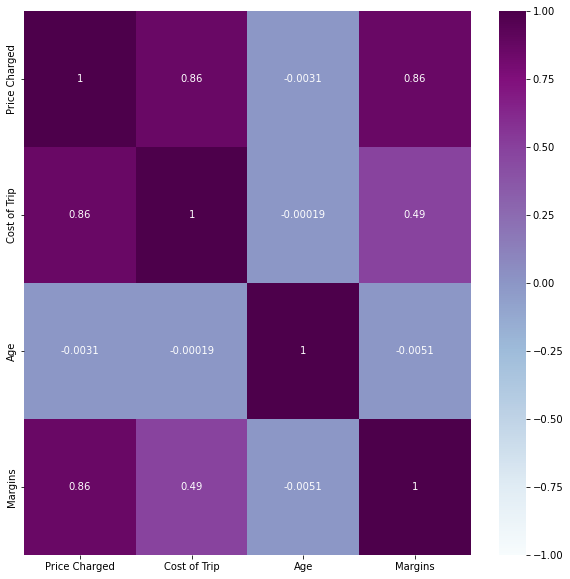

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='BuPu')

### There is a correlation between Margin & Price Charged

Text(0.5, 0, 'Pink Cab KM Travelled')

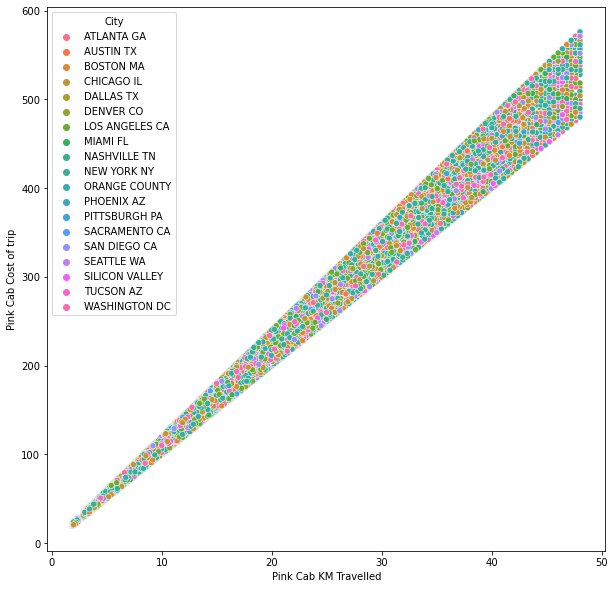

In [161]:
pinkData = MasterData[MasterData['Company'] == 'Pink Cab']

plt.figure(figsize=(10,10))
sns.scatterplot(data=CabData, x=pinkData["KM Travelled"], y=pinkData['Cost of Trip'], hue="City")
plt.ylabel('Pink Cab Cost of trip')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Yellow Cab KM Travelled')

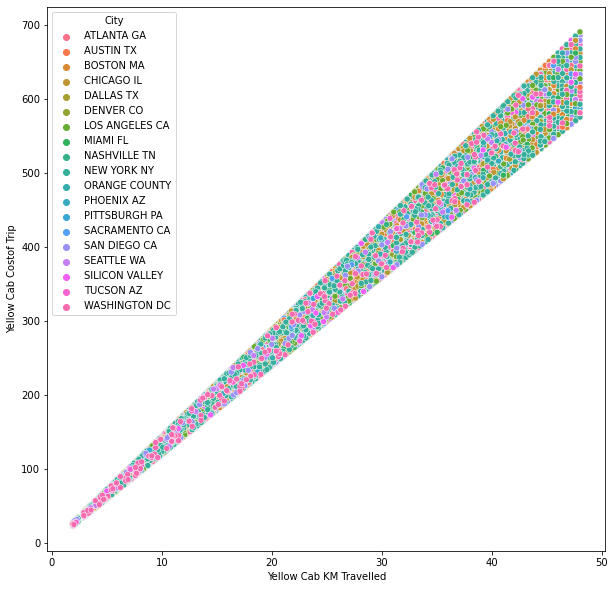

In [162]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=CabData, x=yellowData["KM Travelled"], y=yellowData['Cost of Trip'], hue="City")
plt.ylabel('Yellow Cab Costof Trip')
plt.xlabel('Yellow Cab KM Travelled')

### The cost of trip for both Pink and Yellow cab are almost the same.

In [156]:

MasterData["Profit_of_Trip"] = MasterData["Price_Charged"] - MasterData["Cost_of_Trip"]
data2_1 = MasterData.groupby("City").sum()
fig1 = px.pie(data2_1,
                        values=data2_1.Profit_of_Trip,
                        names=data2_1.index ,title="Total Market Profit Share by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 500 , height = 500 )


### Newyork has more than half of Total Market Profit

In [82]:
pinkData = MasterData[MasterData['Company'] == 'Pink Cab']
yellowData = MasterData[MasterData['Company'] == 'Yellow Cab']

dict1 = {"Pink Cab" : [pinkData["Profit_of_Trip"].sum()] ,"Yellow Cab" : [yellowData["Profit_of_Trip"].sum()] }

data2_2 = pd.DataFrame(dict1).T
fig1 = px.pie(data2_2,
                        values=data2_2[0],
                        names=data2_2.index ,title="Total Market Profit Share by Cab Firms"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 500 , height = 500 )


### The Yellow cab has a higher Profit Margin compared to Pink cab

In [170]:
MasterData["Profit_of_Trip"] = MasterData["Price Charged"] - MasterData["Cost of Trip"]
MasterData["Profit_per_KM"] = MasterData["Profit_of_Trip"].sum() / MasterData["KM Travelled"].sum()
data5_4 = MasterData.groupby("City")["Profit_per_KM"].mean()
data5_4 = pd.DataFrame(data5_4)

fig1 = px.pie(data5_4,
                        values=data5_4["Profit_per_KM"],
                        names=data5_4.index ,title="Average Profit per KM Travelled by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 500 , height = 500 )

### The average profit per travelled in KM by cities is approximately equal.

In [180]:
data5_5 = MasterData.groupby("Company")["Profit_per_KM"].mean()
data5_5 = pd.DataFrame(data5_5)

fig1 = px.pie(data5_5,
                        values=data5_5["Profit_per_KM"],
                        names=data5_5.index ,title="Average Profit per KM Travelled by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 500 , height = 600 )
    

### The average profit per travelled in KM by companies is approximately equal.